In [ ]:
#import all the required libraries.
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Consider the data set X = {xt, rt}Nt=1, where rt ∈ {1, 0}, xt ∈ R. Using any machine learning model, given an x /∈ {x1, x2, ..., xN },Compute the P(1|x), with two different hypothesis, without using any library function. Compare the performance measure of the two different hypotheses and conclude which hypothesis (of the two chosen by you) learns better. Your code should not compute any probability related estimates.

######Input

In [ ]:
from sklearn.datasets import make_classification
d3 = make_classification(n_samples=500, n_features=2, 
n_informative=2, n_redundant=0, n_repeated=0, 
 n_classes=2, n_clusters_per_class=1, 
weights=None, flip_y=0.01, class_sep=1.0, 
 hypercube=True, shift=0.0, scale=1.0, 
shuffle=True, random_state=None)
df = pd.DataFrame(d3[0],columns=['x'+str(i) for i in range(1,3)])
df['y'] = d3[1]
df.head()

,x1,x2,y
0,-1.111327,0.942574,0
1,-0.974204,1.133900,0
2,-0.492663,1.784569,0
3,1.079435,1.233816,1
4,0.935913,1.080430,1


In [ ]:
df.count()

x1    500
x2    500
y     500
dtype: int64

In [ ]:
df.describe()

,x1,x2,y
count,500.000000,500.000000,500.000000
mean,0.009702,1.033434,0.504000
std,1.016420,0.644927,0.500485
min,-1.879746,-0.892179,0.000000
25%,-0.990380,0.623439,0.000000
50%,0.196175,1.034690,1.000000
75%,0.990445,1.441148,1.000000
max,1.365694,3.413373,1.000000


In [ ]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      500 non-null    float64
 1   x2      500 non-null    float64
 2   y       500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [ ]:
df.insert(2,"x1_x2",df['x1']*df['x2'])
df.insert(3,"x1^2",df['x1']**2)
df.insert(4,"x2^2",df['x2']**2)
df.insert(5,"x1^2_x2",df['x1^2']*df['x2'])
df.insert(6,"x2^2_x1",df['x2^2']*df['x1'])
df.insert(7,"x1^3",df['x1']**3)
df.insert(8,"x2^3",df['x2']**3)
df

,x1,x2,x1_x2,x1^2,x2^2,x1^2_x2,x2^2_x1,x1^3,x2^3,y
0,-1.111327,0.942574,-1.047508,1.235047,0.888446,1.164124,-0.987354,-1.372541,0.837427,0
1,-0.974204,1.133900,-1.104650,0.949074,1.285729,1.076155,-1.252563,-0.924592,1.457888,0
2,-0.492663,1.784569,-0.879191,0.242717,3.184685,0.433145,-1.568977,-0.119578,5.683289,0
3,1.079435,1.233816,1.331824,1.165179,1.522302,1.437617,1.643226,1.257735,1.878241,1
4,0.935913,1.080430,1.011189,0.875933,1.167329,0.946385,1.092518,0.819798,1.261217,1
...,...,...,...,...,...,...,...,...,...,...
495,-1.140892,0.530070,-0.604752,1.301635,0.280974,0.689957,-0.320561,-1.485025,0.148936,0
496,1.041962,1.069681,1.114567,1.085684,1.144218,1.161336,1.192231,1.131241,1.223948,1
497,-0.832640,1.331051,-1.108286,0.693290,1.771696,0.922804,-1.475185,-0.577261,2.358218,0
498,0.867435,0.329452,0.285778,0.752444,0.108539,0.247894,0.094150,0.652696,0.035758,1


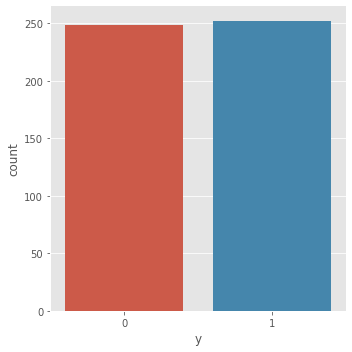

In [ ]:
plt.style.use('ggplot')
sns.catplot(x = 'y', kind = 'count', data = df)

In [ ]:
df['y'].value_counts()

1    252
0    248
Name: y, dtype: int64

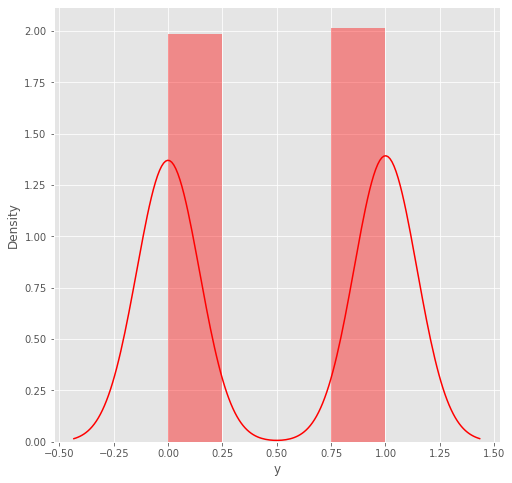

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df['y'], color='red')
plt.show()

As the target column 'y' contains only 0 and 1 as its value, the normal distribution plot shows two bell shaped graph over 0 and 1.

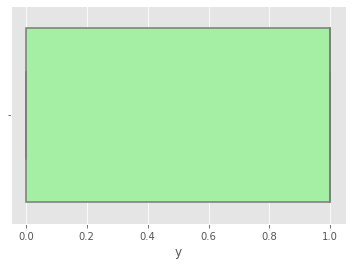

In [ ]:
sns.boxplot(x=df['y'],orient='h',color='palegreen')

In [ ]:
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
iqr = Q3 - Q1
print(iqr)

1.0


In [ ]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
print(upper_limit,lower_limit)

2.5 -1.5


In [ ]:
df[df['y'] > upper_limit]

,x1,x2,x1_x2,x1^2,x2^2,x1^2_x2,x2^2_x1,x1^3,x2^3,y


In [ ]:
df[df['y']<lower_limit]

,x1,x2,x1_x2,x1^2,x2^2,x1^2_x2,x2^2_x1,x1^3,x2^3,y


From the box plot and the results above we can see that there are no rows having target column ('y') values above the upper limit or below the lower limit, showing that there are no outliers present. But we can still do outlier capping which will have no effect on the data set.

In [ ]:
newD=df.copy()
newD['y']=np.where(
    newD['y']>upper_limit,
    upper_limit,
    np.where(
        newD['y']<lower_limit,
        lower_limit,
        newD['y']
    )
)

In [ ]:
class LogitRegression() :
	def __init__( self, learning_rate, iterations ) :		
		self.learning_rate = learning_rate		
		self.iterations = iterations
		
	def fit( self, X, Y ) :		
		self.m, self.n = X.shape		
		self.W = np.zeros( self.n )		
		self.b = 0		
		self.X = X		
		self.Y = Y
				
		for i in range( self.iterations ) :			
			self.update_weights()			
		return self
	
	def update_weights( self ) :		
		A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
		
		tmp = ( A - self.Y.T )		
		tmp = np.reshape( tmp, self.m )		
		dW = np.dot( self.X.T, tmp ) / self.m		
		db = np.sum( tmp ) / self.m
		
		self.W = self.W - self.learning_rate * dW	
		self.b = self.b - self.learning_rate * db
		
		return self

	def predict( self, X ) :	
		Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )		
		Y = np.where( Z > 0.5, 1, 0 )		
		return Y

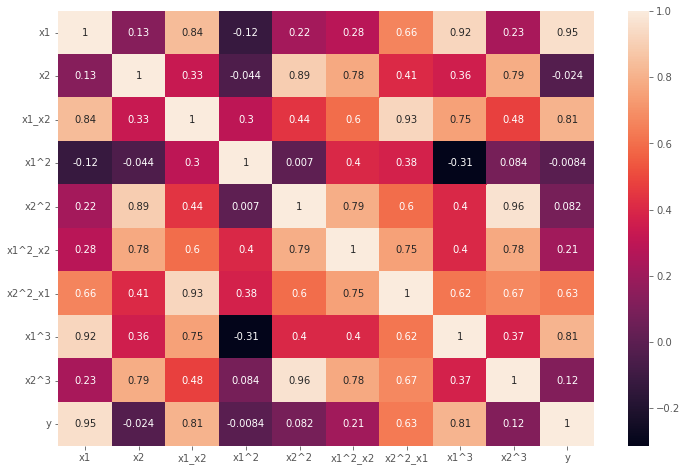

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(newD.corr(), annot = True)
plt.show()

######H1

In [ ]:
X = newD.iloc[:,[0,1]].values
Y = newD.iloc[:,-1:].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 )

In [ ]:
model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
	
model.fit( X_train, Y_train )	
Y_pred = model.predict( X_test )	
correctly_classified = 0	
count = 0	
for count in range( np.size( Y_pred ) ) :
	if Y_test[count] == Y_pred[count] :			
		correctly_classified = correctly_classified + 1
	count = count + 1
		
print( "Accuracy on test set by our model	 : ", (correctly_classified / count ) )

Accuracy on test set by our model	 :  0.9940119760479041


######H2

In [ ]:
X1 = newD.iloc[:,:-1].values
Y1 = newD.iloc[:,-1:].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 1/3, random_state = 0 )

In [ ]:
model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
	
model.fit( X_train, Y_train )	
Y_pred = model.predict( X_test )	
correctly_classified = 0	
count = 0	
for count in range( np.size( Y_pred ) ) :
	if Y_test[count] == Y_pred[count] :			
		correctly_classified = correctly_classified + 1
	count = count + 1
		
print( "Accuracy on test set by our model	 : ", (correctly_classified / count ) )

Accuracy on test set by our model	 :  0.9940119760479041


# 2. Build a Logistic Regression Learning model based on the pseu-docode described in the ‘Introduction to Machine Learning- EthenAlpaydin’, given as follows.
# Consider  a  2-class  dataset  and  train  the  model  (developed  by you) with the dataset chosen by you. Train the Sklearn logisticregression  model  with  the  same  dataset.  Compare  the  perfro-mance of your model and the sklearn model and conclude whichlearns better for the dataset chosen by you.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

### Gradient ascent model 

In [ ]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with log likelihood gradient
        output_error_signal = target - predictions
        
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [ ]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 50000, learning_rate = 5e-5, add_intercept=True)

-4346.264779152365
-148.70672276805357
-142.96493623107847
-141.54530307157367
-141.060319659308


### Using Sklearn's logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_separableish_features, simulated_labels)

LogisticRegression(C=1000000000000000.0)

In [ ]:
print(clf.intercept_, clf.coef_)


[-14.09231079] [[-5.05902155  8.28959202]]


In [ ]:
print(weights)

[-13.58690551  -4.8809644    7.99812915]


### Performance of the two models 

In [ ]:
final_scores = np.dot(np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features)), weights)
preds = np.round(sigmoid(final_scores))


In [ ]:
print('Accuracy of the gradient ascent model is : {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))


Accuracy of the gradient ascent model is : 0.9948


In [ ]:
print('Accuracy of sk-learn: {0}'.format(clf.score(simulated_separableish_features, simulated_labels)))


Accuracy of sk-learn: 0.9948


#4. For a multivariate 2-class data set where all the input attributes are not numerical, implement the logistic regression model for learning the class of the input. Without using any library function, compute the performance measure of the learning model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [ ]:
churn_df = pd.read_csv("/content/drive/MyDrive/Datasets/Churn.csv")
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [ ]:
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
# Label Encoder is used for mapping categorical data into 1, 2, 3, 4, 5, 6..
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [ ]:
le_encoder.fit(churn_df['International plan'].drop_duplicates())

LabelEncoder()

In [ ]:
churn_df['International plan'] = le_encoder.transform(churn_df['International plan'])
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [ ]:
le_encoder.fit(churn_df['Voice mail plan'].drop_duplicates())

LabelEncoder()

In [ ]:
churn_df['Voice mail plan'] = le_encoder.transform(churn_df['Voice mail plan'])
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


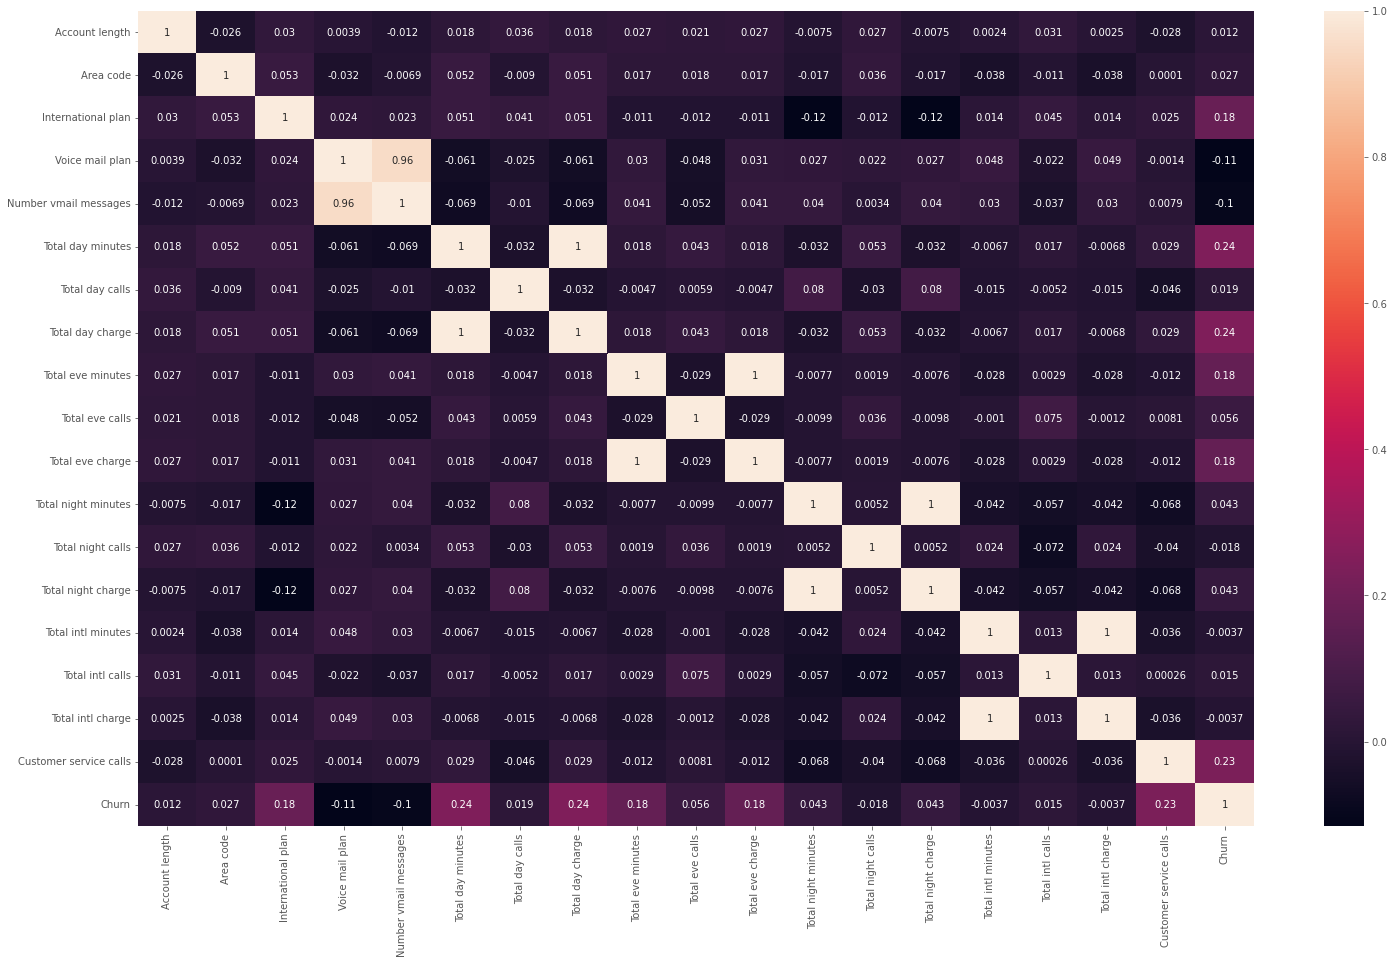

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(churn_df.corr('pearson'), annot = True)

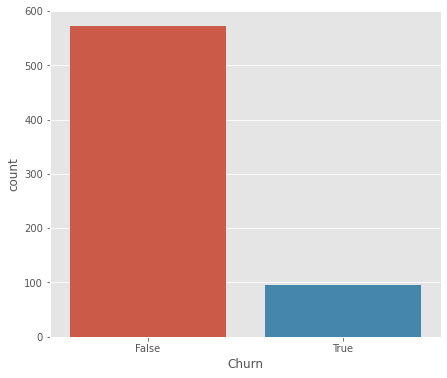

In [ ]:
plt.figure(figsize=(7,6))
sns.countplot('Churn', data = churn_df)

In [ ]:
churn_df['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [ ]:
from sklearn.utils import resample
df_0 = churn_df[churn_df['Churn'] == False]
df_1 = churn_df[churn_df['Churn'] == True]

In [ ]:
df_1.shape

(95, 20)

In [ ]:
df_1_upsample = resample(df_1, n_samples = 288, replace = True, random_state =123)

In [ ]:
df_1_upsample.shape

(288, 20)

In [ ]:
churn_df1 = pd.concat([df_0, df_1_upsample])

In [ ]:
churn_df1.shape

(860, 20)

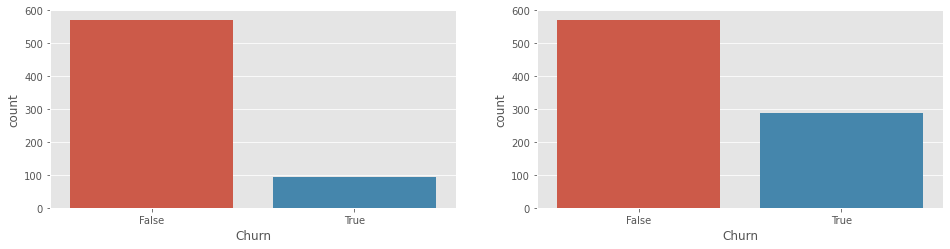

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.countplot('Churn', data = churn_df)
plt.subplot(2,2,2)
sns.countplot('Churn', data = churn_df1)
plt.show()

In [ ]:
X = churn_df1.drop(['State', 'Number vmail messages', 'Total day charge','Total eve charge', 'Total night charge', 'Total intl charge', 'Churn'],axis = 1)
Y = churn_df1['Churn']

In [ ]:
X

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,117,408,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1
3,111,415,0,0,110.4,103,137.3,102,189.6,105,7.7,6,2
4,49,510,0,0,119.3,117,215.1,109,178.7,90,11.1,1,1
5,36,408,0,1,146.3,128,162.5,80,129.3,109,14.5,6,0
6,65,415,0,0,211.3,120,162.6,122,134.7,118,13.2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,128,408,0,0,227.9,130,302.6,71,191.5,82,5.5,7,1
500,58,415,0,0,247.2,116,303.7,103,105.4,94,9.3,2,2
1,65,415,0,0,129.1,137,228.5,83,208.8,111,12.7,6,4
226,80,408,0,0,322.3,113,222.0,95,162.8,123,6.7,8,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 )

**Logistic regression model**

In [ ]:
class MyLogitRegression() :
    learning_rate = 0.01
    iterations = 1000
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

In [ ]:
 mymodel = MyLogitRegression()
 mymodel.fit( X_train, Y_train ) 

In [ ]:
Y_pred = mymodel.predict( X_test )    

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.48      0.80      0.60       119
           1       0.73      0.39      0.51       168

    accuracy                           0.56       287
   macro avg       0.61      0.59      0.55       287
weighted avg       0.63      0.56      0.54       287



# 6. Implement  a  binomial  logistic  regression  learning  model  for  asuitable data set, where input attributes are inR2. Compute theConfusion Matrix of your model for the test data. Compute thefollowing measures for your learning model: (i)Recall (ii)Precision(iii) Accuracy (iv) F-measure.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/titanic.csv", sep = ',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Count of Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
# target column is 'Survived
X = df.drop(['PassengerId','Survived','Name','Sex','Ticket','Cabin','Embarked'], axis = 1)
Y = df['Survived']


In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,3,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500
...,...,...,...,...,...
871,1,47.0,1,1,52.5542
872,1,33.0,0,0,5.0000
879,1,56.0,0,1,83.1583
887,1,19.0,0,0,30.0000


In [ ]:
Y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(C = 10, max_iter=100, solver='liblinear', tol=0.001,random_state=0)


In [ ]:
logit_model.fit(X_train, Y_train)

LogisticRegression(C=10, random_state=0, solver='liblinear', tol=0.001)

In [ ]:
predictions = logit_model.predict(X_test)

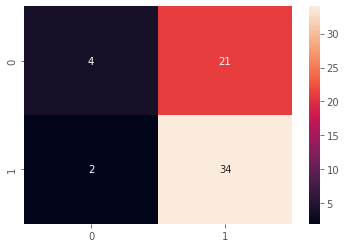

In [ ]:
# heatmap of test dataset
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True, fmt='0.0f')


In [ ]:
# Accuracy
logit_model.score(X_test, Y_test)

0.6229508196721312

In [ ]:
# recall , precession , f1-score
print(classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.67      0.16      0.26        25
           1       0.62      0.94      0.75        36

    accuracy                           0.62        61
   macro avg       0.64      0.55      0.50        61
weighted avg       0.64      0.62      0.55        61



#8. Consider a data set with a minimum of four classes. Use sklearn logistic regression classifier with ‘One Vs One’ strategy and conduct the experiment E1. Train the sklearn classifier with ‘one vs rest’ strategy and conduct the experiment E2. Generate the classfication report for each of the experiment E1 and E2 and conclude which strategy works better for the dataset chosen by you.

In [ ]:
import io
D=pd.read_csv("/content/drive/MyDrive/Datasets/cardio_train.csv",sep=';')

In [ ]:
D.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
D.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

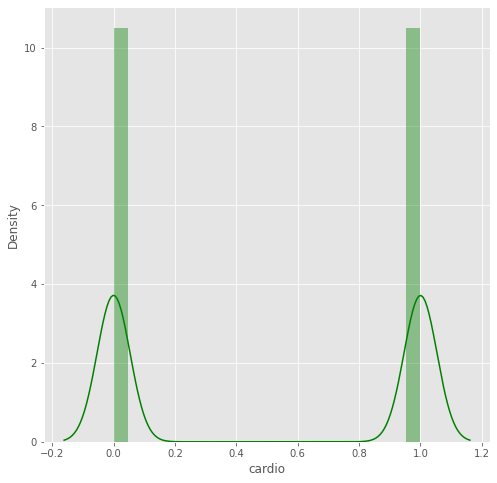

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(D['cardio'], color='green')
plt.show()

The target column 'Stream' contains 6 classes. Hence, the distribution plot shows the density for each of them in a kind of bell shaped plot.

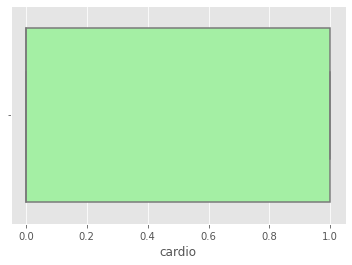

In [ ]:
sns.boxplot(x=D['cardio'],orient='h',color='palegreen')

In [ ]:
Q1 = D['cardio'].quantile(0.25)
Q3 = D['cardio'].quantile(0.75)
iqr = Q3 - Q1
print(iqr)

1.0


In [ ]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
print(upper_limit,lower_limit)

2.5 -1.5


In [ ]:
D[D['cardio'] > upper_limit]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [ ]:
D[D['cardio']<lower_limit]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


From the box plot and the results above we can see that there are no rows having target column ('Stream') values above the upper limit or below the lower limit, showing that there are no outliers present. But we can still do outlier capping which will have no effect on the data set.

In [ ]:
newDF=D.copy()
newDF['cardio']=np.where(
    newDF['cardio']>upper_limit,
    upper_limit,
    np.where(
        newDF['cardio']<lower_limit,
        lower_limit,
        newDF['cardio']
    )
)

No categorical or object data types are present. So, we don't have to do any kind of conversion from categorical or object to numerical data type.

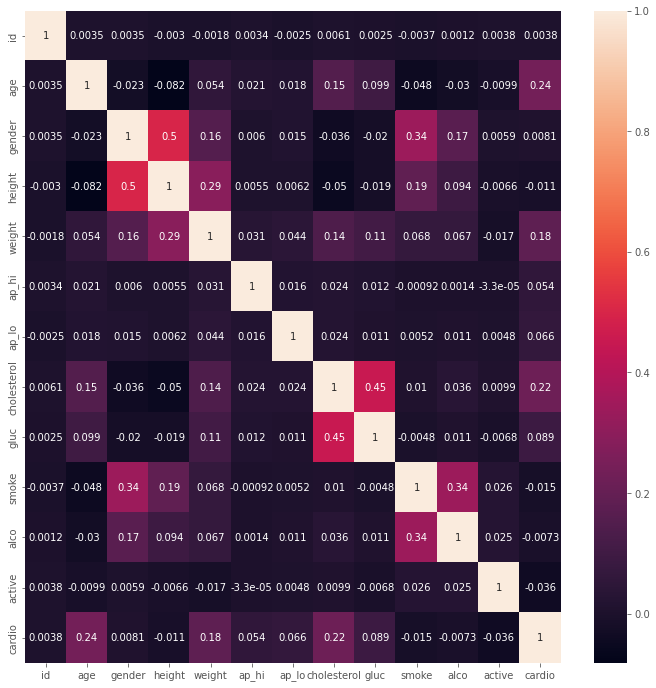

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(newDF.corr('pearson'),annot=True)

In [ ]:
X=newDF.drop(['height','alco','cardio'],axis=1)
Y=newDF['cardio']

In [ ]:
X

,id,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
0,0,18393,2,62.0,110,80,1,1,0,1
1,1,20228,1,85.0,140,90,3,1,0,1
2,2,18857,1,64.0,130,70,3,1,0,0
3,3,17623,2,82.0,150,100,1,1,0,1
4,4,17474,1,56.0,100,60,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,76.0,120,80,1,1,1,1
69996,99995,22601,1,126.0,140,90,2,2,0,1
69997,99996,19066,2,105.0,180,90,3,1,0,0
69998,99998,22431,1,72.0,135,80,1,2,0,0


In [ ]:
Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: cardio, dtype: float64

Splitting the data into training and test data in the ratio of 80:20.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y , test_size=0.2,random_state=3,shuffle=True)

Standardizing the training and test data.

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train, Y_train=sm.fit_resample(X_train, Y_train)

In [ ]:
X_Full=np.hstack((X_train,Y_train.values.reshape(-1,1)))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn import metrics
from sklearn.utils import shuffle

ONE V ONE

In [ ]:
model=LogisticRegression()
ovo=OneVsOneClassifier(model)
ovo.fit(X_train, Y_train.values.ravel())

OneVsOneClassifier(estimator=LogisticRegression())

In [ ]:
ovo_test_pred=ovo.predict(X_test)
print(metrics.classification_report(ovo_test_pred, Y_test))

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65      7389
         1.0       0.62      0.65      0.63      6611

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



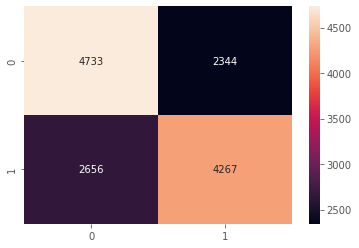

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_test, ovo_test_pred), annot=True, fmt='0.0f')

In [ ]:
ovo_train_pred=ovo.predict(X_train)
print(metrics.classification_report(ovo_train_pred, Y_train))

              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66     29768
         1.0       0.62      0.66      0.64     26344

    accuracy                           0.65     56112
   macro avg       0.65      0.65      0.65     56112
weighted avg       0.65      0.65      0.65     56112



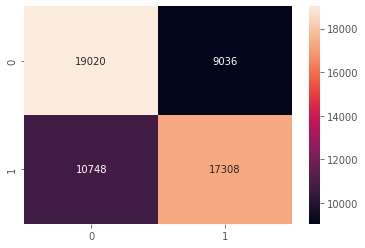

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_train, ovo_train_pred), annot=True, fmt='0.0f')

One vs Rest Classifier -

In [ ]:
ovr=OneVsRestClassifier(model)
ovr.fit(X_train, Y_train.values.ravel())

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
ovr_test_pred=ovr.predict(X_test)
print(metrics.classification_report(ovr_test_pred, Y_test))

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65      7389
         1.0       0.62      0.65      0.63      6611

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



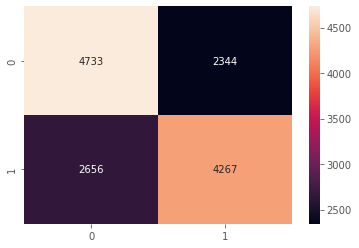

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_test, ovr_test_pred), annot=True, fmt='0.0f')

In [ ]:
ovr_train_pred=ovr.predict(X_train)
print(metrics.classification_report(ovr_train_pred, Y_train))

              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66     29768
         1.0       0.62      0.66      0.64     26344

    accuracy                           0.65     56112
   macro avg       0.65      0.65      0.65     56112
weighted avg       0.65      0.65      0.65     56112



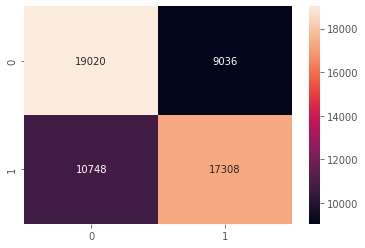

In [ ]:
sns.heatmap(metrics.confusion_matrix(Y_train, ovo_train_pred), annot=True, fmt='0.0f')